In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from cycler import cycler

In [3]:
rr = pd.read_csv('time_series_19-covid-Recovered.csv', sep=',')
rr2 = rr.set_index(['Country/Region','Province/State'])
rr2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,0,0,0,0,2,2,5,5,...,31,31,31,31,31,31,33,34,34,35
Japan,NaN,36.0000,138.0000,0,0,0,0,1,1,1,1,...,43,43,46,76,76,76,101,118,118,118
Singapore,NaN,1.2833,103.8333,0,0,0,0,0,0,0,0,...,78,78,78,78,78,78,78,96,96,97


In [4]:
# read csv:
#df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=';', index_col=0,keep_default_na=False).T
df = pd.read_csv('time_series_19-covid-Confirmed.csv', sep=',')
# re-set the index (row headers):
df2 = df.set_index(['Country/Region','Province/State'])
df2.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Thailand,NaN,15.0000,101.0000,2,3,5,7,8,8,14,14,...,43,47,48,50,50,50,53,59,70,75
Japan,NaN,36.0000,138.0000,2,1,2,2,4,4,7,7,...,331,360,420,461,502,511,581,639,639,701
Singapore,NaN,1.2833,103.8333,0,1,3,3,4,5,7,7,...,110,117,130,138,150,150,160,178,178,200


In [5]:
dfX = df2-rr2
dfX.head(3)

,,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
Country/Region,Province/State,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,1,1,1,1,4,4,5,7,7,7
Albania,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,10,12,23,33
Algeria,NaN,0.0,0.0,0,0,0,0,0,0,0,0,...,12,12,17,17,19,20,20,20,16,18


In [6]:
#remove spurious last column:
df2b = dfX.loc[:, ~df2.columns.str.contains('^Unnamed')]
# transpose:
df3 = df2b.T
df3.head(5)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
Lat                    0.0     0.0     0.0     0.0                 0.0   
Long                   0.0     0.0     0.0     0.0                 0.0   
1/22/20                0.0     0.0     0.0     0.0                 0.0   
1/23/20                0.0     0.0     0.0     0.0                 0.0   
1/24/20                0.0     0.0     0.0     0.0                 0.0   

Country/Region Argentina Armenia Aruba                    Australia  \
Province/State       NaN     NaN   NaN Australian Capital Territory   
Lat                  0.0     0.0   0.0                          0.0   
Long                 0.0     0.0   0.0                          0.0   
1/22/20              0.0     0.0   0.0                          0.0   
1/23/20              0.0     0.0   0.0                          0.0   
1/24/20              0.0     0.0   0.0                          0.0   

Country/Region                        ...        US                        \
Province/State From Diamond Princess  ... Wisconsin Worcester, MA Wyoming   
Lat                              0.0  ...       0.0           0.0     0.0   
Long                             0.0  ...       0.0           0.0     0.0   
1/22/20                          0.0  ...       0.0           0.0     0.0   
1/23/20                          0.0  ...       0.0           0.0     0.0   
1/24/20                          0.0  ...       0.0           0.0     0.0   

Country/Region                 Ukraine United Arab Emirates  United Kingdom  \
Province/State Yolo County, CA     NaN                  NaN Channel Islands   
Lat                        0.0     0.0                  0.0             0.0   
Long                       0.0     0.0                  0.0             0.0   
1/22/20                    0.0     0.0                  0.0             0.0   
1/23/20                    0.0     0.0                  0.0             0.0   
1/24/20                    0.0     0.0                  0.0             0.0   

Country/Region                          Vietnam  
Province/State Gibraltar United Kingdom     NaN  
Lat                  0.0            0.0     0.0  
Long                 0.0            0.0     0.0  
1/22/20              0.0            0.0     0.0  
1/23/20              0.0            0.0     2.0  
1/24/20              0.0            0.0     2.0  

[5 rows x 421 columns]

In [7]:
# remove Lat/Long rows
df4 = df3.drop(['Lat','Long'])
df4.tail(3)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
3/11/20                7.0    12.0    20.0     1.0                 0.0   
3/12/20                7.0    23.0    16.0     0.0                 0.0   
3/13/20                7.0    33.0    18.0     1.0                 1.0   

Country/Region Argentina Armenia Aruba                    Australia  \
Province/State       NaN     NaN   NaN Australian Capital Territory   
3/11/20             19.0     1.0   0.0                          0.0   
3/12/20             19.0     4.0   0.0                          0.0   
3/13/20             31.0     8.0   2.0                          1.0   

Country/Region                        ...        US                        \
Province/State From Diamond Princess  ... Wisconsin Worcester, MA Wyoming   
3/11/20                          0.0  ...       5.0           0.0     0.0   
3/12/20                          0.0  ...       7.0           0.0     1.0   
3/13/20                          0.0  ...      18.0           0.0     1.0   

Country/Region                 Ukraine United Arab Emirates  United Kingdom  \
Province/State Yolo County, CA     NaN                  NaN Channel Islands   
3/11/20                    0.0     1.0                 57.0             2.0   
3/12/20                    0.0     1.0                 68.0             2.0   
3/13/20                    0.0     3.0                 68.0             2.0   

Country/Region                          Vietnam  
Province/State Gibraltar United Kingdom     NaN  
3/11/20              0.0          438.0    22.0  
3/12/20              0.0          438.0    23.0  
3/13/20              0.0          780.0    31.0  

[3 rows x 421 columns]

In [8]:
# convert index to dateTime:
df4.index = pd.DatetimeIndex(df4.index)
df4.head(3)

Country/Region Afghanistan Albania Algeria Andorra Antigua and Barbuda  \
Province/State         NaN     NaN     NaN     NaN                 NaN   
2020-01-22             0.0     0.0     0.0     0.0                 0.0   
2020-01-23             0.0     0.0     0.0     0.0                 0.0   
2020-01-24             0.0     0.0     0.0     0.0                 0.0   

Country/Region Argentina Armenia Aruba                    Australia  \
Province/State       NaN     NaN   NaN Australian Capital Territory   
2020-01-22           0.0     0.0   0.0                          0.0   
2020-01-23           0.0     0.0   0.0                          0.0   
2020-01-24           0.0     0.0   0.0                          0.0   

Country/Region                        ...        US                        \
Province/State From Diamond Princess  ... Wisconsin Worcester, MA Wyoming   
2020-01-22                       0.0  ...       0.0           0.0     0.0   
2020-01-23                       0.0  ...       0.0           0.0     0.0   
2020-01-24                       0.0  ...       0.0           0.0     0.0   

Country/Region                 Ukraine United Arab Emirates  United Kingdom  \
Province/State Yolo County, CA     NaN                  NaN Channel Islands   
2020-01-22                 0.0     0.0                  0.0             0.0   
2020-01-23                 0.0     0.0                  0.0             0.0   
2020-01-24                 0.0     0.0                  0.0             0.0   

Country/Region                          Vietnam  
Province/State Gibraltar United Kingdom     NaN  
2020-01-22           0.0            0.0     0.0  
2020-01-23           0.0            0.0     2.0  
2020-01-24           0.0            0.0     2.0  

[3 rows x 421 columns]

In [17]:
# extract regions we are interested in:
df6 = df4.loc[:,[
    ('China','Hubei'),
    ('China','Beijing'),
    ('Germany',''),
    ('Italy',''),
    ('Japan',''),
    ('France','France'),
#    ('China','Anhui'),
    ('Switzerland',''),
    ('Singapore',''),
    ('Korea, South',''),
    ('Poland',''),
#    ("US","King County, WA")
]]
df6.tail(3)

Country/Region    China         Germany    Italy  Japan  France Switzerland  \
Province/State    Hubei Beijing     NaN      NaN    NaN  France         NaN   
2020-03-11      18639.0   109.0  1883.0  11417.0  521.0  2269.0       648.0   
2020-03-12      17463.0   101.0  2053.0  11417.0  521.0  2269.0       648.0   
2020-03-13      16233.0    94.0  3629.0  16221.0  583.0  3649.0      1135.0   

Country/Region Singapore Korea, South Poland  
Province/State       NaN          NaN    NaN  
2020-03-11          82.0       7467.0   31.0  
2020-03-12          82.0       7536.0   49.0  
2020-03-13         103.0       7469.0   68.0

In [18]:
# divide by population density.  first had this via separate csv files, 
# but the "countries" are not stable in the upstream data
df6.loc[:,('China','Beijing')] /= 22.
df6.loc[:,('China','Hubei')] /= 60.
df6.loc[:,('Japan',np.nan)] /= 126.8
df6.loc[:,('Korea, South',np.nan)] /= 52.
df6.loc[:,('Singapore',np.nan)] /= 5.85
df6.loc[:,('France','France')] /= 67.
df6.loc[:,('Germany',np.nan)] /= 82.79
df6.loc[:,('Italy',np.nan)] /= 60.5
df6.loc[:,('Switzerland',np.nan)] /= 8.57
df6.loc[:,('Poland',np.nan)] /= 4.
#df6.loc[:,("US","King County, WA")] /= 2.2
df6.tail(3)

Country/Region   China              Germany       Italy     Japan     France  \
Province/State   Hubei   Beijing        NaN         NaN       NaN     France   
2020-03-11      310.65  4.954545  22.744293  188.710744  4.108833  33.865672   
2020-03-12      291.05  4.590909  24.797681  188.710744  4.108833  33.865672   
2020-03-13      270.55  4.272727  43.833796  268.115702  4.597792  54.462687   

Country/Region Switzerland  Singapore Korea, South Poland  
Province/State         NaN        NaN          NaN    NaN  
2020-03-11       75.612602  14.017094   143.596154   7.75  
2020-03-12       75.612602  14.017094   144.923077  12.25  
2020-03-13      132.438740  17.606838   143.634615  17.00

In [19]:
# time-shifted Hubei values:
hb = df6["China","Hubei"]
hb.index = pd.date_range(start="2020-03-05",periods=hb.size)
hb.name=("China","Hubei time-shifted")
hb.tail(3)

2020-04-23    310.65
2020-04-24    291.05
2020-04-25    270.55
Freq: D, Name: (China, Hubei time-shifted), dtype: float64

In [29]:
df6b = pd.concat([df6,hb],axis=1) #.fillna(value=0)
# mar/12 data looks faulty especially in Europe:
df6b.drop(index=pd.to_datetime('2020-03-12'),inplace=True)
df6b.loc['2020-03-10':'2020-03-15',:]

Country/Region       China              Germany       Italy     Japan  \
Province/State       Hubei   Beijing        NaN         NaN       NaN   
2020-03-10      333.616667  4.954545  17.381326  155.785124  3.785489   
2020-03-11      310.650000  4.954545  22.744293  188.710744  4.108833   
2020-03-13      270.550000  4.272727  43.833796  268.115702  4.597792   
2020-03-14             NaN       NaN        NaN         NaN       NaN   
2020-03-15             NaN       NaN        NaN         NaN       NaN   

Country/Region     France Switzerland  Singapore Korea, South Poland  \
Province/State     France         NaN        NaN          NaN    NaN   
2020-03-10      26.447761   56.942824  14.017094   139.730769   5.50   
2020-03-11      33.865672   75.612602  14.017094   143.596154   7.75   
2020-03-13      54.462687  132.438740  17.606838   143.634615  17.00   
2020-03-14            NaN         NaN        NaN          NaN    NaN   
2020-03-15            NaN         NaN        NaN          NaN    NaN   

Country/Region              China  
Province/State Hubei time-shifted  
2020-03-10              22.966667  
2020-03-11              57.900000  
2020-03-13              80.216667  
2020-03-14              94.416667  
2020-03-15             116.416667

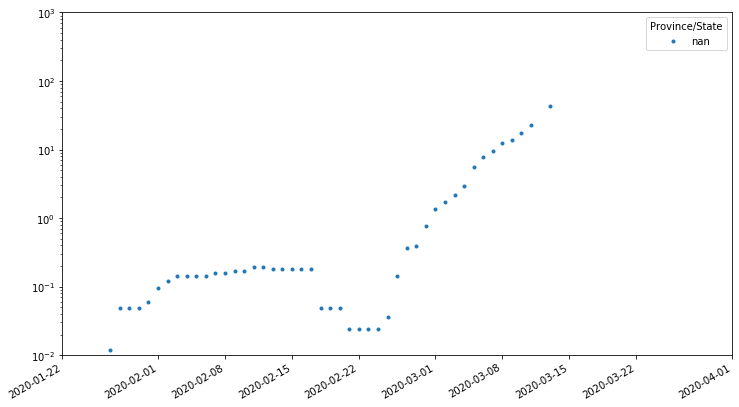

In [30]:
plt.close('all')
plt.rcParams['figure.figsize']=[12,7]
df6b['Germany'].plot(kind='line',marker="o",markersize=3,linewidth=0,logy=True,ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

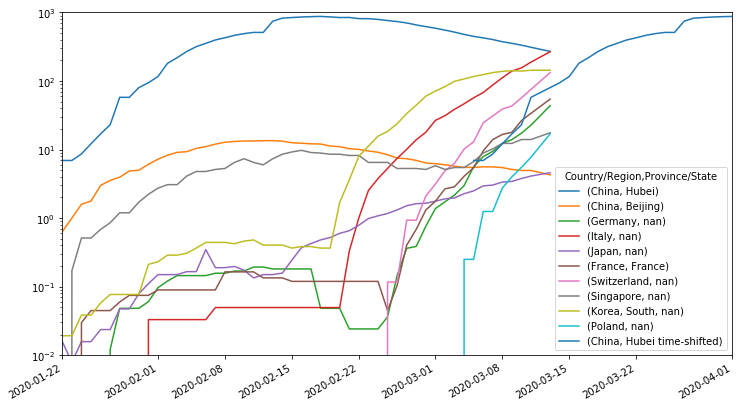

In [31]:
df6b.plot(kind='line',logy=True,ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

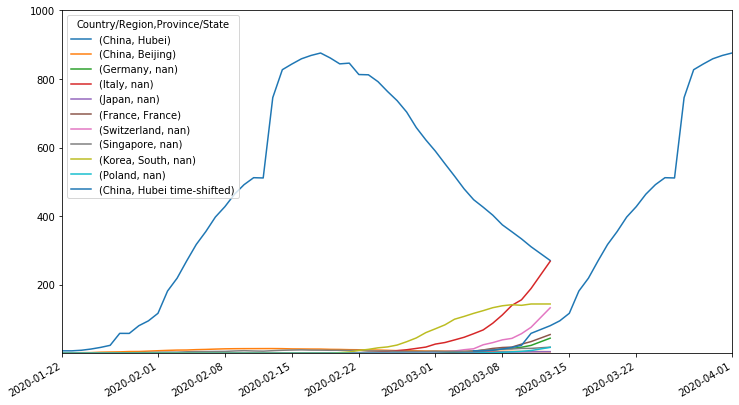

In [32]:
df6b.plot(kind='line',ylim=(0.01,1000),xlim=("2020-01-22","2020-04-01"))

In [16]:
df6.loc[:,('Poland',np.nan)].to_string()

'2020-01-22     0.00\n2020-01-23     0.00\n2020-01-24     0.00\n2020-01-25     0.00\n2020-01-26     0.00\n2020-01-27     0.00\n2020-01-28     0.00\n2020-01-29     0.00\n2020-01-30     0.00\n2020-01-31     0.00\n2020-02-01     0.00\n2020-02-02     0.00\n2020-02-03     0.00\n2020-02-04     0.00\n2020-02-05     0.00\n2020-02-06     0.00\n2020-02-07     0.00\n2020-02-08     0.00\n2020-02-09     0.00\n2020-02-10     0.00\n2020-02-11     0.00\n2020-02-12     0.00\n2020-02-13     0.00\n2020-02-14     0.00\n2020-02-15     0.00\n2020-02-16     0.00\n2020-02-17     0.00\n2020-02-18     0.00\n2020-02-19     0.00\n2020-02-20     0.00\n2020-02-21     0.00\n2020-02-22     0.00\n2020-02-23     0.00\n2020-02-24     0.00\n2020-02-25     0.00\n2020-02-26     0.00\n2020-02-27     0.00\n2020-02-28     0.00\n2020-02-29     0.00\n2020-03-01     0.00\n2020-03-02     0.00\n2020-03-03     0.00\n2020-03-04     0.25\n2020-03-05     0.25\n2020-03-06     1.25\n2020-03-07     1.25\n2020-03-08     2.75\n2020-03-09  

In [ ]:
df6.loc[:,('Poland',np.nan)]

In [ ]:
df5.loc[:,('Mainland China','Anhui')] /= 9999999.
df5.head(3)

In [ ]:
df5.to_csv("all.csv")

In [ ]:
df6['idx'] = df6.reset_index().index
df6.tail(3)

In [ ]:
df6.to_csv("reduced.csv",sep='\t',header=False)

In [ ]:
df6.iterrows?

In [ ]:
hb = df6["Mainland China"]["Hubei"]
hb.index = pd.date_range(start="2020-02-22",periods=hb.size)
hb.head(3)

In [ ]:
hb.index = pd.DatetimeIndex?

In [ ]:
pd.date_range(start="2020-01-22",periods=5)